In [1]:

import numpy as np
from KRZmetric import *
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

datadir='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\'

%matplotlib inline

In [60]:
###一些参数的定义
####决定取哪些作为parameter

parN=10 #参数数目

Fmatrix=np.zeros((parN,parN))#Fisher matrix
par=np.zeros((parN))
par[0]=0.5 #par0是spin
par[1]=0 #par1是d1
par[2]=np.log10(1e6) #par2是log M
par[3]=np.log10(1e-4) #par3是log massratio
par[4]=np.log10(5e9) #par4是log R_pc
par[5]=np.pi/4.0 #par5是THETA
par[6]=0 #par6是PHI
par[7] =0.5#e
par[8] =10#p
par[9] =np.pi/4.0#iota
#在Kerr下，与 E = 0.9650301802;Lz = 2.6093423541; Q = 6.8172571150对应的是 ecc=0.5 p=10 iota=np.pi/4.0

#dpar=np.zeros((parN,1)) #对参数求导取的步长
dpar=par*0.001 #这里先用0.001倍的参数值作为步长
dpar[1]=0.002
dpar[6]=0.01

#其他参数先假设不贡献FisherMAtrix
d2=0
d3=0

tottime=3e4

In [61]:
#生成波形
spin=par[0]
d1=par[1]
M=np.power(10,par[2])
massratio=np.power(10,par[3])

#Observation angle, will be used to transform hbar to hTT 
R_pc=np.power(10,par[4])
THETA=par[5] #45/180*np.pi  #latitude angle, in rad
PHI=par[6]  #azimuthal angle, in rad
ecc  =par[7] 
p    =par[8] 
iota =par[9] 

E,Lz,Q=getELQ(ecc,p,iota,spin)
print('M=%f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f; tottime=%f; massratio=%.10e;'%(M,d1,spin,p,ecc,iota,E,Lz,Q,tottime,massratio))
print('R_pc=%.10e; THETA=%.10e; PHI=%.10e;'%(R_pc,THETA,PHI))

M=1000000.000000; krz_d[1]= 0.000000; spin = 0.500000;current_p = 10.000000;current_e = 0.500000;current_iota = 0.785398;
E=0.9650301802;Lz=2.6093423541; Q=6.8172571150; tottime=30000.000000; massratio=1.0000000000e-04;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;


In [62]:


#读数据
filename=datadir+'wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3,R_pc,THETA,PHI,massratio)
baset,wave_plus,wave_cross=np.loadtxt(filename,unpack=True)
basewave=wave_plus+1j*wave_cross
basewave

array([ -2.48414506e-22 +2.38933435e-22j,
        -2.51795549e-22 +2.33631189e-22j,
        -2.55430060e-22 +2.27731796e-22j, ...,
        -3.99317844e-22 +3.74749520e-22j,
        -4.03639203e-22 +3.69233821e-22j,  -4.07873469e-22 +3.63677344e-22j])

In [63]:
#计算参数分别变化dpar后的波形

for ii in np.arange(parN):
    par[ii]=par[ii]+dpar[ii]
    spin=par[0]
    d1=par[1]
    M=np.power(10,par[2])
    massratio=np.power(10,par[3])
    R_pc=np.power(10,par[4])
    THETA=par[5] 
    PHI=par[6]
    ecc=par[7]
    p=par[8]
    iota=par[9]
    E,Lz,Q=getELQ(ecc,p,iota,spin)
    print('M=%f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f; tottime=%f; massratio=%.10e;'%(M,d1,spin,p,ecc,iota,E,Lz,Q,tottime,massratio))
    print('R_pc=%.10e; THETA=%.10e; PHI=%.10e;\n'%(R_pc,THETA,PHI))

    par[ii]=par[ii]-dpar[ii]

M=1000000.000000; krz_d[1]= 0.000000; spin = 0.500500;current_p = 10.000000;current_e = 0.500000;current_iota = 0.785398;
E=0.9650291943;Lz=2.6092343586; Q=6.8167109580; tottime=30000.000000; massratio=1.0000000000e-04;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;

M=1000000.000000; krz_d[1]= 0.002000; spin = 0.500000;current_p = 10.000000;current_e = 0.500000;current_iota = 0.785398;
E=0.9650301802;Lz=2.6093423541; Q=6.8172571150; tottime=30000.000000; massratio=1.0000000000e-04;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;

M=1013911.385737; krz_d[1]= 0.000000; spin = 0.500000;current_p = 10.000000;current_e = 0.500000;current_iota = 0.785398;
E=0.9650301802;Lz=2.6093423541; Q=6.8172571150; tottime=30000.000000; massratio=1.0000000000e-04;
R_pc=5.0000000000e+09; THETA=7.8539816340e-01; PHI=0.0000000000e+00;

M=1000000.000000; krz_d[1]= 0.000000; spin = 0.500000;current_p = 10.000000;current_e = 0.500000;current_iota = 0.785398;
E=0.9650

In [64]:
#参数分别变化dpar后的波形
wave=[]
par[0]=0.5
thistime=[]
for ii in np.arange(parN):
    par[ii]=par[ii]+dpar[ii]
    print(par)
    spin=par[0]
    d1=par[1]
    M=np.power(10,par[2])
    massratio=np.power(10,par[3])
    R_pc=np.power(10,par[4])
    THETA=par[5] 
    PHI=par[6]
    ecc=par[7]
    p=par[8]
    iota=par[9]
    E,Lz,Q=getELQ(ecc,p,iota,spin)
    filename=datadir+'wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3,R_pc,THETA,PHI,massratio)
    t,wave_plus,wave_cross=np.loadtxt(filename,unpack=True)
    thiswave=wave_plus+1j*wave_cross
    wave.append(thiswave)
    thistime.append(t)
    par[ii]=par[ii]-dpar[ii]

[  0.5005       0.           6.          -4.           9.69897      0.78539816
   0.           0.5         10.           0.78539816]
[  5.00000000e-01   2.00000000e-03   6.00000000e+00  -4.00000000e+00
   9.69897000e+00   7.85398163e-01   0.00000000e+00   5.00000000e-01
   1.00000000e+01   7.85398163e-01]
[  0.5          0.           6.006       -4.           9.69897      0.78539816
   0.           0.5         10.           0.78539816]
[  0.5          0.           6.          -4.004        9.69897      0.78539816
   0.           0.5         10.           0.78539816]
[  0.5          0.           6.          -4.           9.70866897
   0.78539816   0.           0.5         10.           0.78539816]
[  0.5          0.           6.          -4.           9.69897      0.78618356
   0.           0.5         10.           0.78539816]
[  0.5          0.           6.          -4.           9.69897      0.78539816
   0.01         0.5         10.           0.78539816]
[  0.5          0.          

0
1
2
3
4
5
6
7
8
9


D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'retarded time')

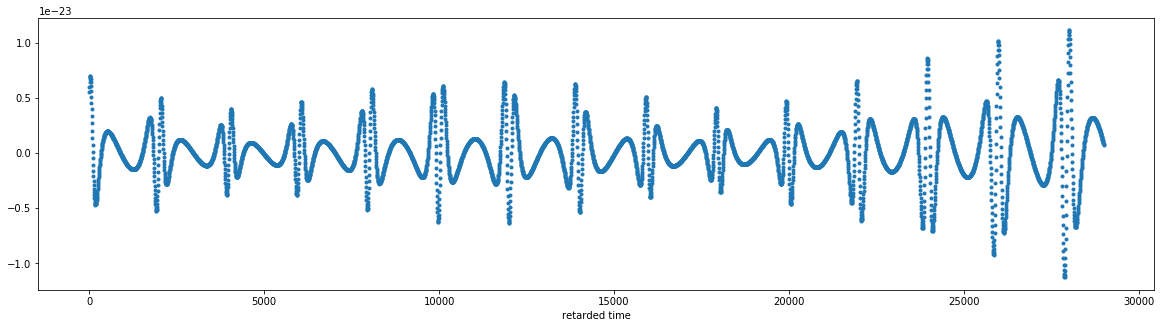

In [65]:
#interpolate
base=interp1d(baset,basewave,kind='cubic')
wave_intpf=[]
for ii in np.arange(parN): 
    print(ii)
    wave1=interp1d(thistime[ii],wave[ii],kind='cubic')
    wave_intpf.append(wave1)
    #wave2=interp1d(thistime[1],wave[1],kind='cubic')

lintime=np.arange(0,tottime-1000,5)
intpwave=[]
intpbase=base(lintime)
for ii in np.arange(parN):
    intpwave.append(wave_intpf[ii](lintime))
    #intpwave.append(wave2(lintime))

fig=plt.figure()
fig.set_size_inches(20, 5)
#plt.xlim(0,20000)
#plt.ylim(-1,1)
#plt.plot(baset,basewave)

#plt.plot(lintime,intpbase)
#plt.plot(lintime,intpwave2)
#plt.plot(lintime,(intpwave[0]-intpbase)*4)
#plt.plot(lintime,intpwave[1]-intpbase)
#plt.plot(lintime,intpwave[2]-intpbase)
#plt.plot(lintime,intpwave[3]-intpbase)
plt.plot(lintime,intpwave[4]-intpbase,'.')
#plt.plot(thistime[4],wave[4])
#plt.plot(lintime,intpwave[4])
#
#plt.plot(baset,basewave)
#plt.plot(lintime,intpbase)

#plt.plot(lintime,intpbase)
#plt.plot(lintime,(intpwave1-intpbase))
#plt.plot(lintime,(intpwave2-intpbase)*100)
#plt.plot(t,np.real(mydata)*R/mu)
plt.xlabel('retarded time')

In [66]:
dt=5.0
#SNR=np.sqrt(bracket_interp([lintime,intpbase],[lintime,intpbase]))
SNR=np.sqrt(bracket(intpbase,intpbase,5.0))
print(SNR)
Fmatrix=np.zeros([parN,parN])
for ii in np.arange(parN):
    for jj in np.arange(parN):
        Fmatrix[ii,jj]=bracket(30/SNR*(intpwave[ii]-intpbase)/dpar[ii],30/SNR*(intpwave[jj]-intpbase)/dpar[jj],dt)
        #重复 PHYSICAL REVIEW D 96, 044005 (2017)，里面SNR normalized to 30


8.49441785648e-05


In [67]:

#采样频率
fs=1/dt
mydata=intpbase
mytemp=intpwave[0]
#做傅里叶变换，注意要除以采样频率才是真的amplitude
mydata_fft=np.fft.fft(mydata)/len(mydata)
mytemp_fft=np.fft.fft(mytemp)/len(mydata)
#变换后的频率序列,注意，只有前一半是正的频率
freq=np.fft.fftfreq(min( len(mydata),len(mytemp)),dt)

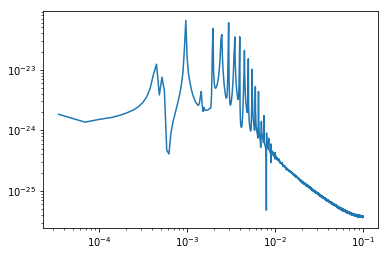

In [68]:
plt.loglog(freq,np.abs(mydata_fft))

In [69]:
print(Fmatrix)

[[  3.60302233e+05   1.81722329e+05   5.05851310e+05   1.41567380e+04
    3.36700038e+03   6.63420380e+03   2.47157443e+04   1.10644174e+07
    8.39031994e+05   9.10233693e+04]
 [  1.81722329e+05   2.57252904e+05   2.47973374e+03   1.09130846e+04
    1.42685401e+03   8.24604723e+03   2.45001324e+04   9.40609459e+06
    7.54064054e+05   8.27870685e+03]
 [  5.05851310e+05   2.47973374e+03   3.98901242e+07   2.75395756e+05
    2.68148398e+05   1.29896162e+05   6.27358016e+04   2.09355188e+07
    2.41121728e+06   2.32759434e+05]
 [  1.41567380e+04   1.09130846e+04   2.75395756e+05   5.19182634e+03
    4.70856890e+03   1.23977626e+03   1.47134663e+03   6.75295804e+05
    6.65576099e+04   2.70168806e+03]
 [  3.36700038e+03   1.42685401e+03   2.68148398e+05   4.70856890e+03
    4.66651824e+03   1.57108988e+03   5.50483770e+02   2.50166539e+05
    3.37276433e+04   7.95420015e+02]
 [  6.63420380e+03   8.24604723e+03   1.29896162e+05   1.23977626e+03
    1.57108988e+03   1.29356283e+03   4.28330

In [70]:
length=len(intpbase)
for i in np.arange(0.1,1.01,0.1):
    SNR=np.sqrt(bracket(intpbase[0:int(i*length)],intpbase[0:int(i*length)],5.0))
    print(i*length,SNR)

580.0 0.0002708502756
1160.0 0.000165627147821
1740.0 0.000129915222864
2320.0 0.000103507600376
2900.0 9.04291307238e-05
3480.0 7.84725253802e-05
4060.0 7.76869549146e-05
4640.0 7.55190284909e-05
5220.0 8.16439644616e-05
5800.0 8.49441785648e-05


In [71]:
Fmatrix=np.mat(Fmatrix)#([[Fmatrix[0,0],Fmatrix[0,1]],[Fmatrix[1,0],Fmatrix[1,1]] ])

In [72]:
Fmatrix.I

matrix([[  2.07623036e-04,   4.08889525e-05,   1.23418197e-06,
           5.10411187e-04,  -5.57979242e-04,   1.32013087e-07,
          -1.97193500e-04,  -8.78379727e-06,   4.88009958e-05,
          -2.86672777e-04],
        [  4.08889525e-05,   1.77529076e-03,  -1.92678520e-06,
          -1.12627645e-02,   9.03221463e-03,   8.39934087e-07,
          -2.22280260e-03,  -1.28838646e-04,   1.17657592e-03,
           3.14136043e-03],
        [  1.23418197e-06,  -1.92678520e-06,   5.35638681e-08,
           2.13819656e-05,  -2.11957519e-05,   1.25653622e-07,
           1.00830236e-06,   1.03502421e-07,  -1.16935108e-06,
          -5.96321949e-06],
        [  5.10411187e-04,  -1.12627645e-02,   2.13819656e-05,
           8.16951505e-02,  -6.54908588e-02,  -1.20178827e-03,
           1.40921509e-02,   8.31399087e-04,  -7.91555730e-03,
          -2.17737213e-02],
        [ -5.57979242e-04,   9.03221463e-03,  -2.11957519e-05,
          -6.54908588e-02,   5.28277218e-02,   1.26207587e-03,
      

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


9980.0 8.59047777598e-05
14970.0 6.56482208789e-05
19960.0 6.03076919911e-05
24950.0 5.43005235581e-05
29940.0 4.90802997224e-05
34930.0 4.69690550155e-05
39920.0 4.25637891389e-05
44910.0 4.16529378329e-05
49900.0 3.83614577072e-05
54890.0 3.74564302478e-05
59880.0 3.57460505129e-05
64870.0 3.42589554886e-05
69860.0 3.34575489385e-05
74850.0 3.18155398915e-05
79840.0 3.14009769345e-05
84830.0 2.99327586006e-05
89820.0 2.94913479393e-05
94810.0 2.86632066662e-05
99800.0 2.78692507982e-05


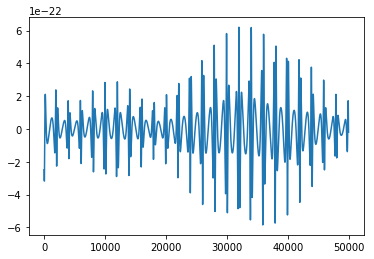

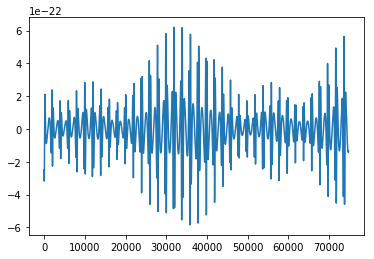

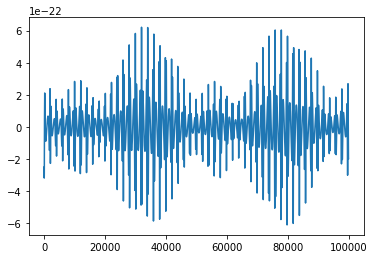

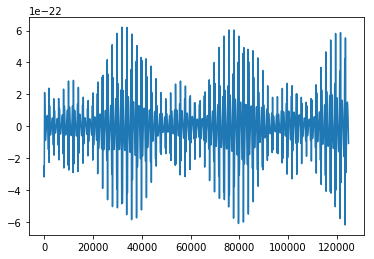

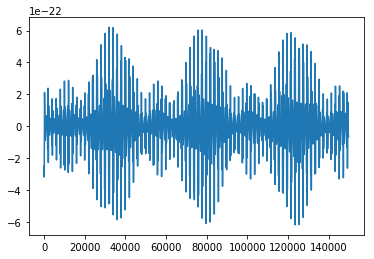

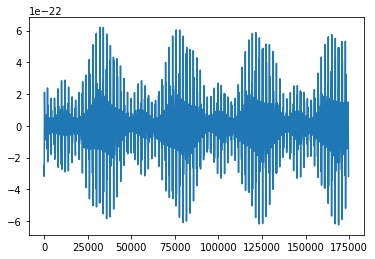

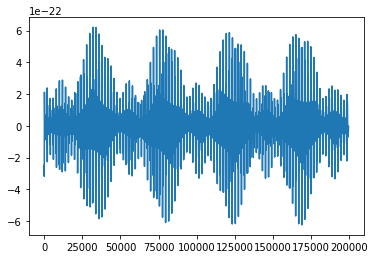

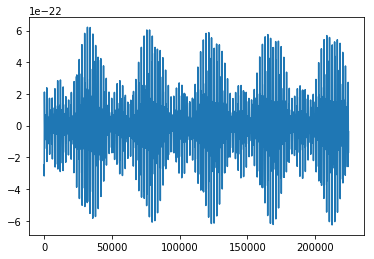

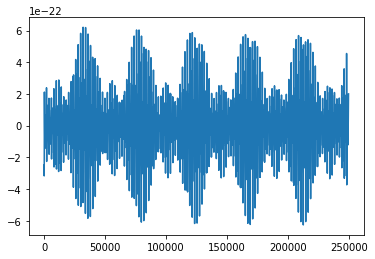

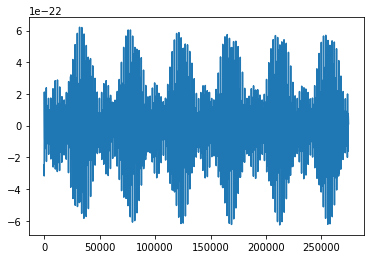

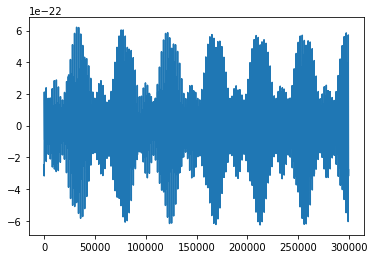

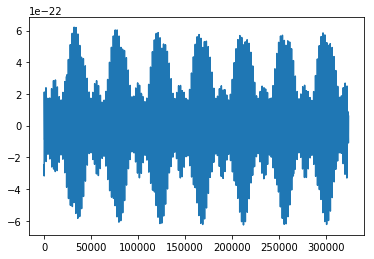

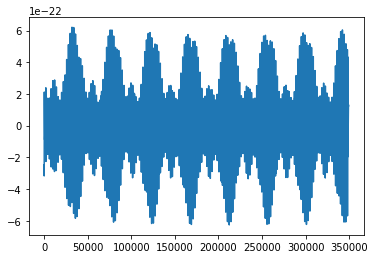

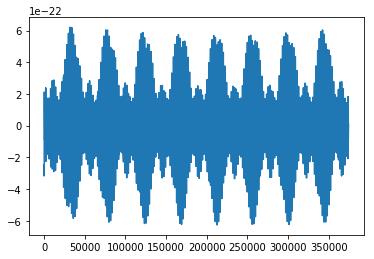

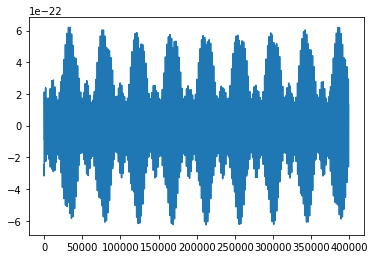

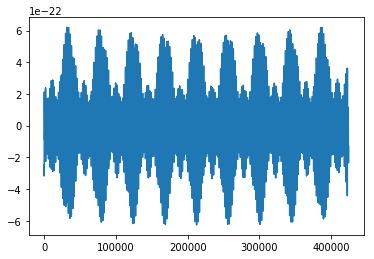

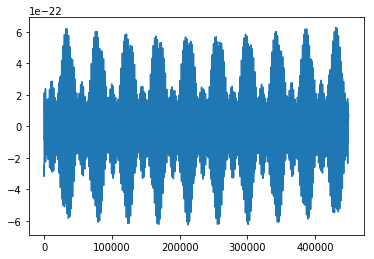

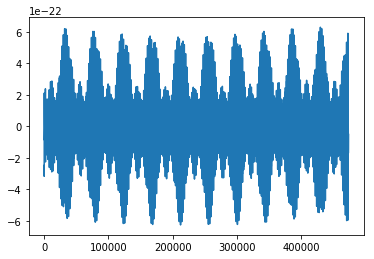

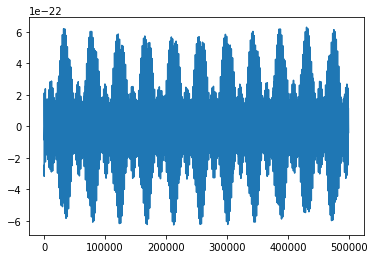

In [82]:
#see SNR & time
#读数据
tottime=500000
filename=datadir+'wave_M1000000_spin0.500000_E0.965030_Lz2.609342_Q6.817257_d10.000000_d20.000000_d30.000000_r5.000000e+09_t7.853982e-01_p0.000000e+00_mu1.000000e-04.dat'#'wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f_r%.6e_t%.6e_p%.6e_mu%.6e.dat'%(M,spin,E,Lz,Q,d1,d2,d3,R_pc,THETA,PHI,massratio)
baset,wave_plus,wave_cross=np.loadtxt(filename,unpack=True)
basewave=wave_plus+1j*wave_cross

base=interp1d(baset,basewave,kind='cubic')
lintime=np.arange(0,tottime-1000,5)
intpwave=[]
intpbase=base(lintime)

tlist=[]
SNRlist=[]
length=len(intpbase)
for i in np.arange(0.1,1.01,0.05):
    plt.figure()
    plt.plot(lintime[0:int(i*length)-1],intpbase[0:int(i*length)-1])
    SNR=np.sqrt(bracket(intpbase[0:int(i*length)],intpbase[0:int(i*length)],5.0))
    print(i*length,SNR)
    tlist.append(lintime[int(i*length)-1])
    SNRlist.append(SNR)

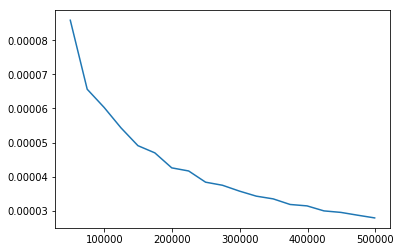

In [83]:
plt.plot(tlist,SNRlist)